<a href="https://colab.research.google.com/github/ryannemilligan/Traffic-Sign-Recognition-Deep-Learning/blob/main/Project_3_(Traffic_Sign_Recognition)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traffic Sign Recognition

# The Scenario

"More than 38,000 people die every year in crashes on U.S. roadways. The U.S. traffic fatality rate is 12.4 deaths per 100,000 inhabitants. An additional 4.4 million are injured seriously enough to require medical attention." <br>

This brings with it the utmost importance to introduce autonomous vehicles to keep the people safe. <br>
However, to truly keep the people safe, the vehicles must be able to recognize the traffic signs and act accordingly. <br>

You are an AI Engineer with DriveSafe, a company that focuses on building autonomous vehicles.<br>
Your current task is to train the vehicles to recognize the traffic signs.<br>

Source: https://www.asirt.org/safe-travel/road-safety-facts/


# Tips for working on this project
You will be using these three concepts to be able to successfully complete this project:
1. Deep Learning models
2. AI Project Cycle <br>
3. AI Ethics <br>

If needed, please revise your notes on these topics.

# Section 1: Understand the Problem

One of the key points of solving an AI problem is to understand the problem statement correctly. <br>
You need to understand what is the correct problems that you are solving.<br>
You want to solve the root problem and not the symptoms.<br>
To do that, you can use tools like 5 Whys, decomposition, and Fish-bone diagram.<br>
You can then write your problem statement.<br>
It may include helpful information, like who is affected, what is the problem, where is it happening, and when does it happen.<br>

Based on the scenario above, write your problem statement in the cell below.<br>

In [1]:
# There are a lot of roadway crashes and fatalities in the United States which
# signifies a need for increased vehicle safety. Autonomous vehicles are
# therefore being developed, but the effectiveness of these vehicles in decreasing
# these accidents is only as good as their ability to accurately perceive and then
# react to their environment in real time. The problem is then to develop an AI
# that is capable of the accuracies of recognizing traffic signs, which will
# enable autonomous vehicles to make safe driving decisions to reduce accidents,
# injuries, and deaths.



# Section 2: Data Acquisition

Data is the main ingredient for AI model. <br>
For a typical scenario for autonomous vehicles, where can you find your data? <br>
Write your answer in the cell below. <br>

In this scenario, you are given a few files.<br>
These files are downloaded from: https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign <br>


In [2]:
# Your answers here!


## The AI Ethics of Handling Data
AI Ethics are a vital component in our daily life. <br>
What areas of AI Ethics are important in this scenario? <br>
What are the implications of ignoring AI Ethics? <br>
More importantly, what can you do to uphold AI Ethics in this scenario? <br>
Write your answer in the cell below.

In [3]:
# AI Ethics in Data Handling for Autonomous Vehicles: Privacy issues when
# accidentally capturing data on humans, Bias based on not capturing all traffic
# signs in weather conditions, lighting, etc.

# Implications of Ignoring AI Ethics: Legal issues like lawsuits, safety risks
# based on inaccurate models which would go against the whole point of AVs, loss
# of trust from the public in AVs, reputation issues with bad publicity.

# How to Uphold AI Ethics in this Scenario: Anonymize data to protect the privacy
# of humans, license plates, etc, make sure data is diverse ans covers different
# regions, lighting conditions, and angles to avoid bias, obtaining proper licensing,
# audits regularly, being transparent with the data sources, and lastly human
# oversight and QA.


# Import libraries and insert the file

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split

# Uncomment the below if your tensorflow is 2.x
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [5]:
print(tf.__version__)

2.18.0


# Section 3: Data Exploration
Let's prepare the data so that it's ready for the modeling.

In [7]:
# Let's initialize some variables
data = []
labels = []
classes = 43
current_path = os.getcwd()

In [8]:
from google.colab import files
files.upload()
# importing my kaggle.json

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"ryannemilligan","key":"acbec2f4368fc1585031595751c43d46"}'}

In [9]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json


In [10]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
#importing dataset and directly from kaggle

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 98% 599M/612M [00:03<00:00, 141MB/s]
100% 612M/612M [00:03<00:00, 178MB/s]


In [11]:
!unzip -q gtsrb-german-traffic-sign.zip -d /content/train


In [12]:
# Retrieve the images and their labels
import os
from PIL import Image
import numpy as np

data = []
labels = []
classes = 43
current_path = '/content/train'


for i in range(classes):
    path = os.path.join(current_path, 'train', str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image_path = os.path.join(path, a)
            image = Image.open(image_path)
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(f"Error loading image {a}: {e}")


## Train Test Split
Do you still remember how to split your data into training data and testing data? <br>
For easy reference, you need to create: X_train, X_test, y_train, y_test <br>

What ratio will you use to do the split? <br>
Common ratios are 70:30 and 80:20.

In [13]:
# Convert lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

# Your answers here!
#Split into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42, stratify=labels
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


31,367 training images and 7,842 testing images.

Each image is 30x30 pixels with 3 color channels (RGB).

Arrays match the image counts exactly.

## One Hot Encoding

Usually, numbers in Machine Learning algorithms mean ranking or importance. <br>
However, some input data do not have any ranking. This may lead to poor predictions. <br>
Therefore, we need to use one hot encoding to solve the above problem. <br>
Do you still remember how to do that? <br>
Write your answer in the cell below.

In [14]:
# Your answers here!
# Convert the labels into one hot encoding

from tensorflow.keras.utils import to_categorical

one_hot_labels = to_categorical(labels, num_classes=43)

print(one_hot_labels.shape)  # Should be (num_samples, 43)

y_train = to_categorical(y_train, num_classes=43)
y_test = to_categorical(y_test, num_classes=43)



(39209, 43)


(39209, 43) confirms that my labels are correctly one-hot encoded

# Section 4: Modeling
We will be building our Neural Network. <br>
Do you still remember how it looks like? <br>

There are different layers, each with different purposes:
1. Conv2D : it is a 2D convolution layer to produce a tensor of outputs.
2. MaxPool2D : it reduces the size by sampling the maximum value in the region.
3. Dropout : it drops some neural network connections to prevent overfitting. <br>

In the cell below, create your own Neural Network model. <br>
You can experiment by mixing layers of Conv2D, MaxPool2D, and Dropout, of varying parameters.

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense

#Build the model
model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(30,30,3)))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(43, activation='softmax'))
















/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compilation
You will need to determine what is the metrics for your model. <br>
You've learned about binary_crossentropy and categorical_crossentropy. <br>
You've also learned about the different optimizers (ADAM, SGD, etc).

In [16]:
# Your answers here!
# Compile the model

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)



## How long do you want to train your model?
You can determine how many cycles you want to run. <br>
In Machine Learning, a cycle is called an epoch. <br>
Theoretically, the more epoch will lead to higher acuracy. However, it may lead to overfitting. <br>
You can also determine the size of each batch. The bigger the batch size, the more data it will be tested at one time. <br>
However, it will be more taxing on your computing resources too. <br>

In the cell below, indicate your epoch, batch_size, and the code for model.fit().

In [17]:
# Your answers here!

epochs = 10
batch_size = 32

history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test),
    shuffle=True
)


Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.0544 - loss: 7.9461 - val_accuracy: 0.0566 - val_loss: 3.5571
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.0556 - loss: 3.5371 - val_accuracy: 0.0566 - val_loss: 3.5028
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.0555 - loss: 3.4982 - val_accuracy: 0.0574 - val_loss: 3.4897
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.0554 - loss: 3.4950 - val_accuracy: 0.0574 - val_loss: 3.4868
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.0552 - loss: 3.4896 - val_accuracy: 0.0574 - val_loss: 3.4859
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.0562 - loss: 3.4843 - val_accuracy: 0.0574 - val_loss: 3.4856
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.0572 - loss: 3.4905 - val_accuracy: 0.0574 - val_loss: 3.4855
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.0586 - loss: 3.4816 - 

# Section 5: Evaluation
We want to check the performance of our model. <br>
We want to know the accuracy of the results. <br>
Do you know how to identify underfitting and overfitting (if any) from the below graphs?

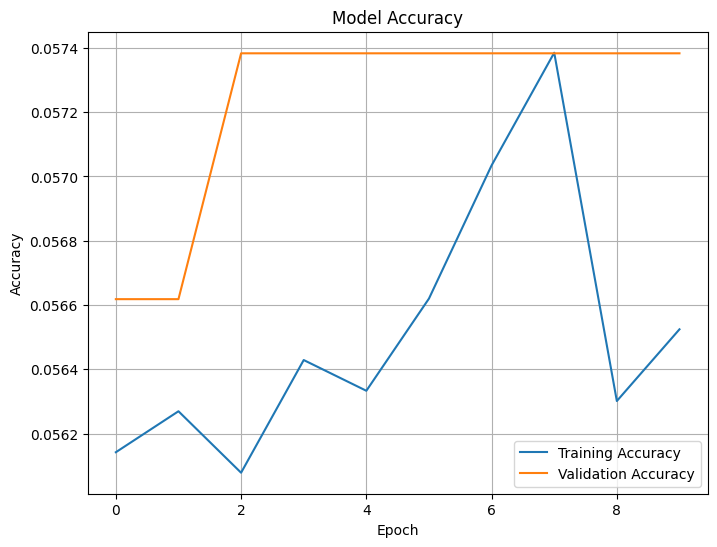

In [18]:
# Your answers here!

# plot the graph for accuracy

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()









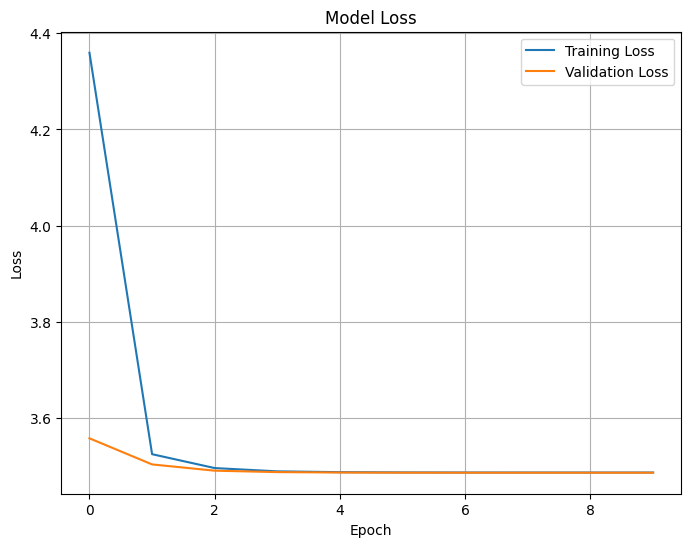

In [19]:
# Your answers here!

# plot the graph for loss

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()







## Evaluate using Test Dataset
Just now, we evaluated the model using the data from the training dataset. <br>
Now, we will evaluate using Test.csv, which is the data that the model has never seen before.

In [22]:
# test accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('/content/train/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

In [31]:
for i, path in enumerate(imgs[:5]):
    print(f"Original path {i}: {path}")

if imgs[0].startswith('/content/train/'):
    print("Paths already have full prefix. Using as is.")
else:
    print("Paths are relative. Prepending '/content/train/'")
    imgs = ['/content/train/' + path for path in imgs]


Original path 0: /content/train//content/train//content/train/test/Test/00000.png
Original path 1: /content/train//content/train//content/train/test/Test/00001.png
Original path 2: /content/train//content/train//content/train/test/Test/00002.png
Original path 3: /content/train//content/train//content/train/test/Test/00003.png
Original path 4: /content/train//content/train//content/train/test/Test/00004.png
Paths already have full prefix. Using as is.


In [32]:
y_test = pd.read_csv('/content/train/Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values


In [34]:
imgs = ['/content/train/test/' + path for path in imgs]


In [36]:
# Fix the broken paths
from PIL import Image
import numpy as np
import pandas as pd


# Reload CSV so imgs are clean
y_test = pd.read_csv('/content/train/Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

# Prepend full folder path only once
imgs = ['/content/train/' + path for path in imgs]

data = []
for img in imgs:
    try:
        image = Image.open(img)
        image = image.resize((30, 30))
        data.append(np.array(image))
    except Exception as e:
        print(f"Error loading {img}: {e}")

X_test = np.array(data)
print(f"Loaded {len(X_test)} images.")



Loaded 12630 images.


## Check accuracy
Use accuracy_score from sklearn.metrics to compare the score between the actual labels and predictions.

In [37]:
# Your answers here!
# Accuracy with the test data
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(labels, pred)
print(f"Accuracy: {accuracy:.4f}")



Accuracy: 0.0594


# What is your best model?
In order to get the best model, you will need to modify the parameters. <br>
Look back at the models in section 4, can you fine-tune them better? <br><br>
What is your best model? How does it fare?

My model initially had an accuracy of 5.94% which is terrible.  I started with 10 epoch and a batch size of 32.  I then went back and tweaked it to 20 epochs with a batch size of 64.

# Section 6: Deployment
What makes a good deployment? <br>
It has to be useful and easy to use. <br>
It needs to be updated frequently and easily.<br>
Deployment can be on-premise or online.<br>

In the cell below, write down your suggestions on how you can deploy this AI model.

In [ ]:
# Your answers here!

# Since this is used on autonomous vehicle, it will be used in the embedded system of the car.
# The camera feeds from the camera will be captured and analyzed by the model directly.

# Other Reading Materials
You can get more info through these materials: <br>
